# Analyze Hyperparameter Tuning


In [143]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import sys
FILENAME = "f_KNN_MUTAG_TEST_2024-06-26_15-52-52_results.csv"

In [144]:
filepath= "configs/results/Hyperparameter_tuning_results/SVC_Simple-Prototype-GED_poly_hyperparameter_tuning_all_results.xlsx"

In [145]:

# # find the file in the directory
# filepath = None
# for root, dirs, files in os.walk("."):
#     if FILENAME in files:
#         filepath = os.path.join(root, FILENAME)
#         break


In [146]:
hyper_df = pd.read_excel(filepath)

In [147]:
results_column ="mean_test_score"

In [148]:
# a function that gets two column names form the df, one result column, which represents the score, and one regarding a certain hyperparameter.
# this second parameter, can be categorical or numerical.
# if its categorical, i want a box plot, plotting the mean and max score for each category
# if its numerical, i want a scatter plot, plotting the score against the hyperparameter value
def plot_hyperparameter_effect(hyper_df, hyperparameter_column, results_column, Model_Name):
    if hyperparameter_column not in hyper_df.columns:
        print(f"Column {hyperparameter_column} not found in DataFrame.")
        return
    if results_column not in hyper_df.columns:
        print(f"Column {results_column} not found in DataFrame.")
        return

    # check if the hyperparameter column is numerical or categorical
    plt.figure(figsize=(10, 6))
    plt.title(f'{Model_Name} - Effect of {hyperparameter_column} on {results_column}')

    if pd.api.types.is_numeric_dtype(hyper_df[hyperparameter_column]):
        # numerical, scatter plot
        
        sns.scatterplot(data=hyper_df, x=hyperparameter_column, y=results_column)
        # add a line plot for better visibility
        sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')
        sns.regplot(data=hyper_df, x=hyperparameter_column, y=results_column, scatter=False, color='green', label='Trend Line')
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.grid(True)
        plt.show()
    else:
        # categorical, bor plot
        # summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        # summary_df = summary_df.melt(id_vars=hyperparameter_column, value_vars=['mean', 'max'], var_name='Statistic', value_name='Score')

        # Use violinplot for richer distribution visualization
        sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", scale="width")
        # Overlay mean and max points for each category
        summary_df = hyper_df.groupby(hyperparameter_column)[results_column].agg(['mean', 'max']).reset_index()
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="mean", color="blue", label="Mean", marker="o", s=100, zorder=10)
        sns.scatterplot(data=summary_df, x=hyperparameter_column, y="max", color="red", label="Max", marker="X", s=100, zorder=10)
        plt.xlabel(hyperparameter_column)
        plt.ylabel(results_column)
        plt.legend(title='Statistic')
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()

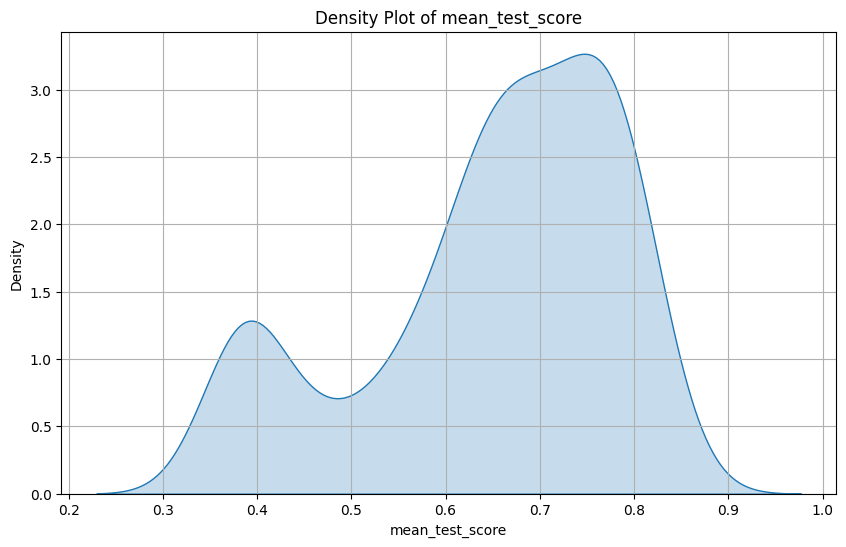

In [149]:
# plot the desity of the results collumn
plt.figure(figsize=(10, 6))
plt.title(f'Density Plot of {results_column}')
sns.kdeplot(data=hyper_df, x=results_column, fill=True)
plt.xlabel(results_column)
plt.ylabel('Density')
plt.grid(True)
plt.show()

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


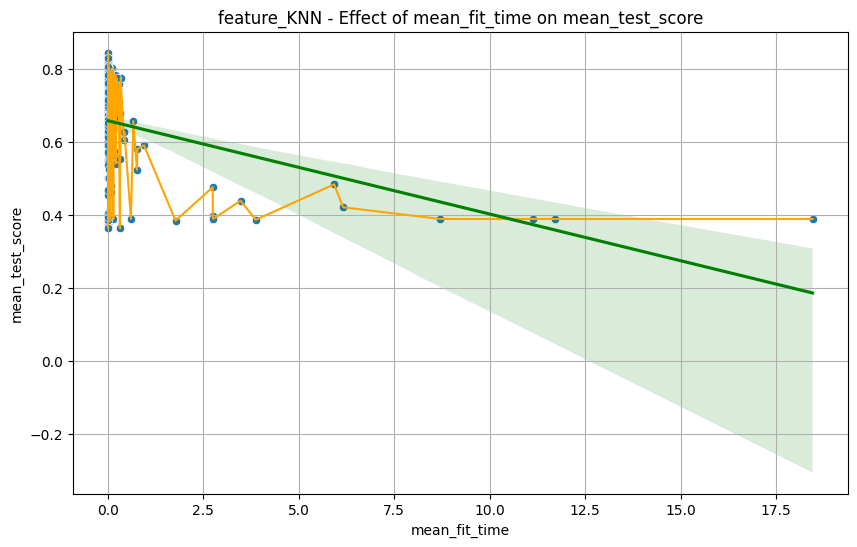

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


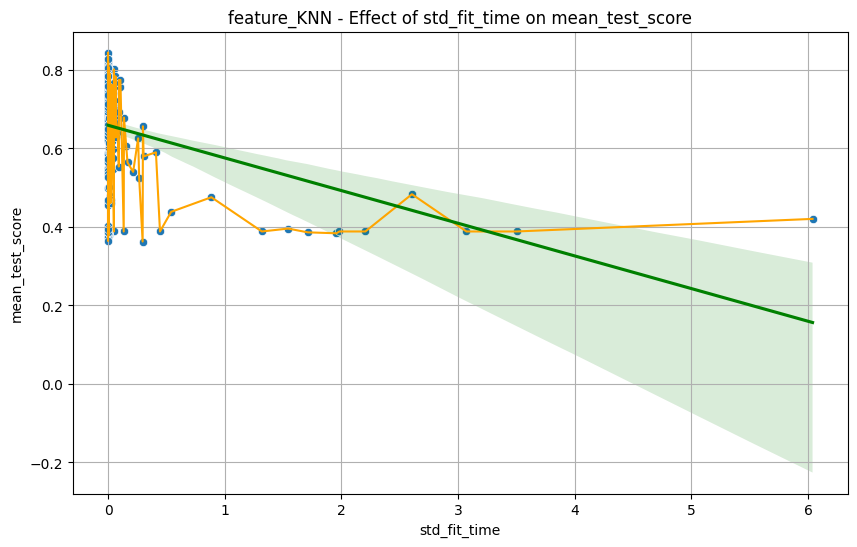

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


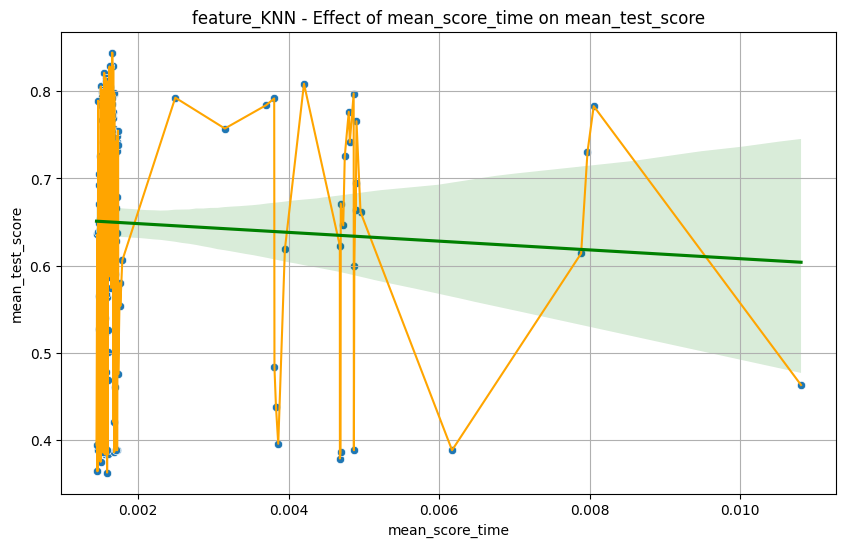

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


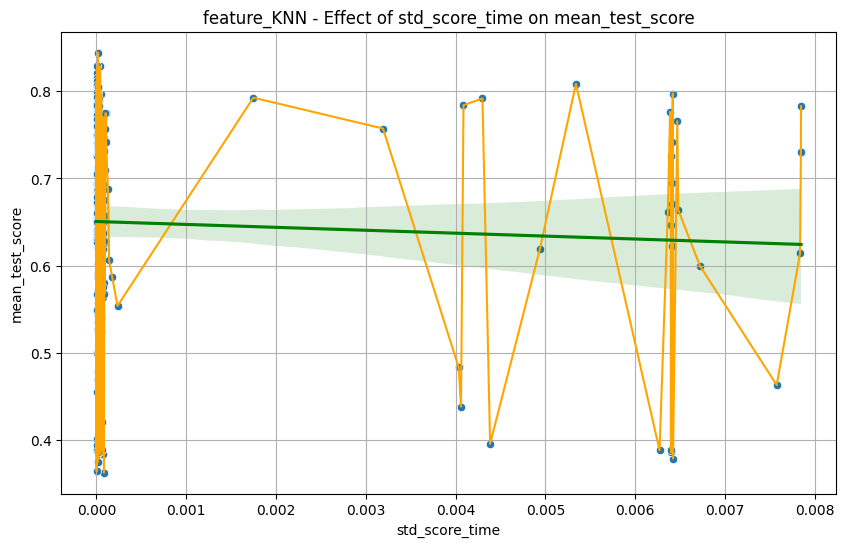

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


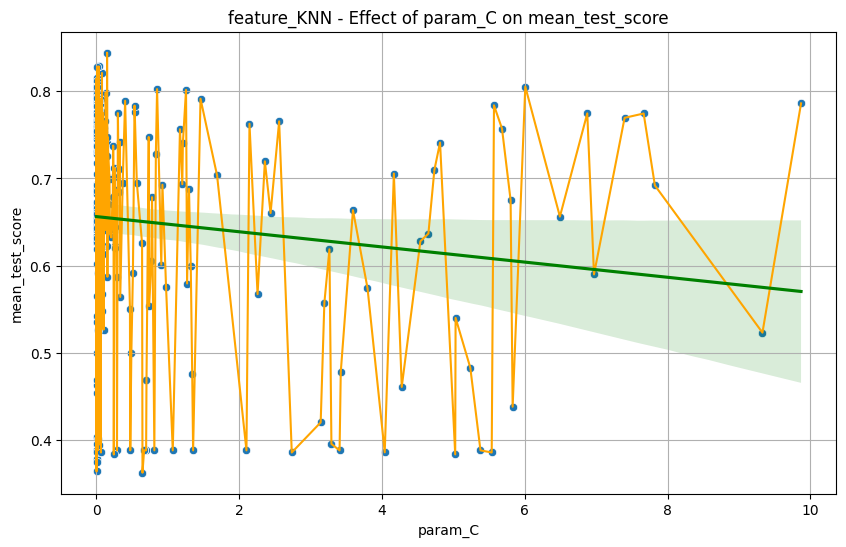

/tmp/ipykernel_1350456/3581515702.py:34: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", scale="width")


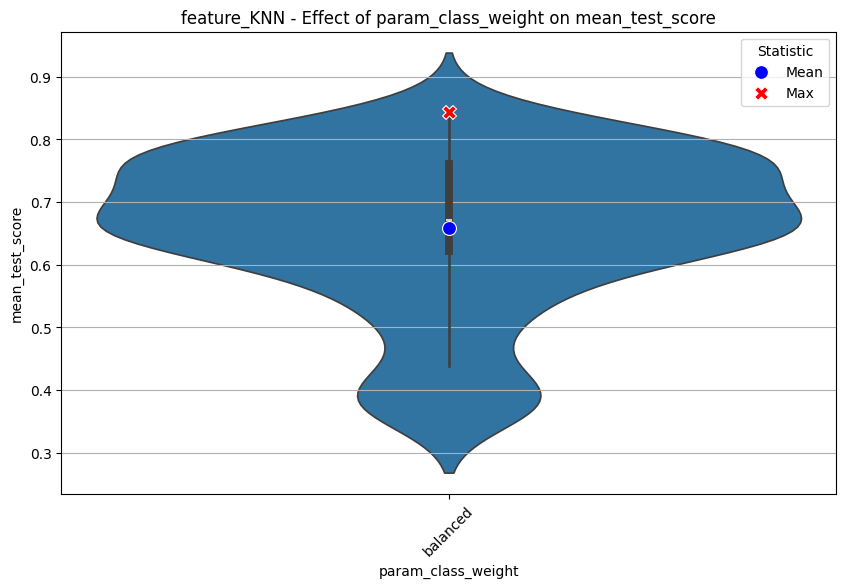

/tmp/ipykernel_1350456/3581515702.py:34: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", scale="width")


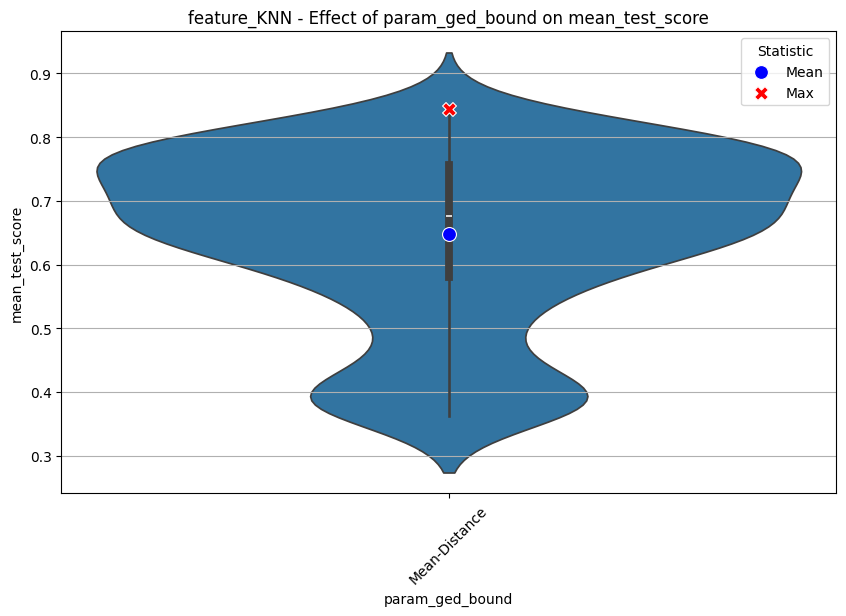

/tmp/ipykernel_1350456/3581515702.py:34: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", scale="width")


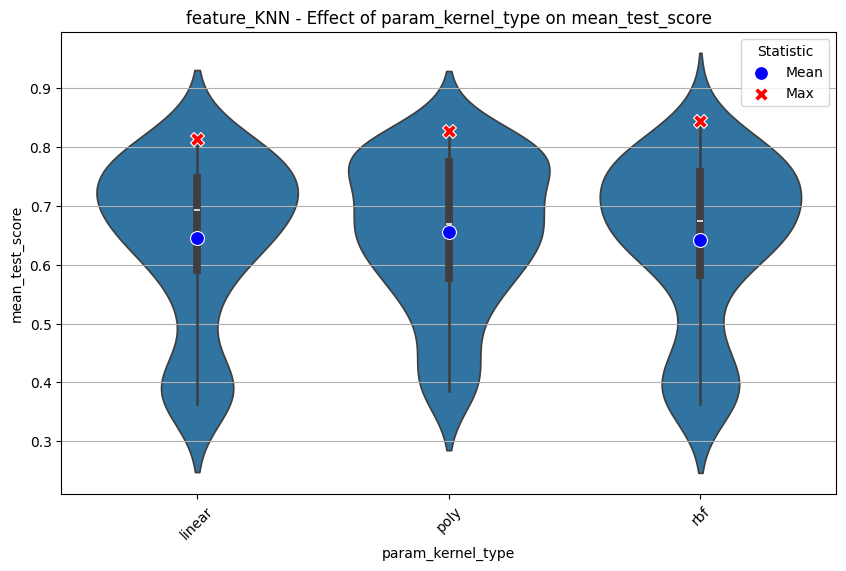

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


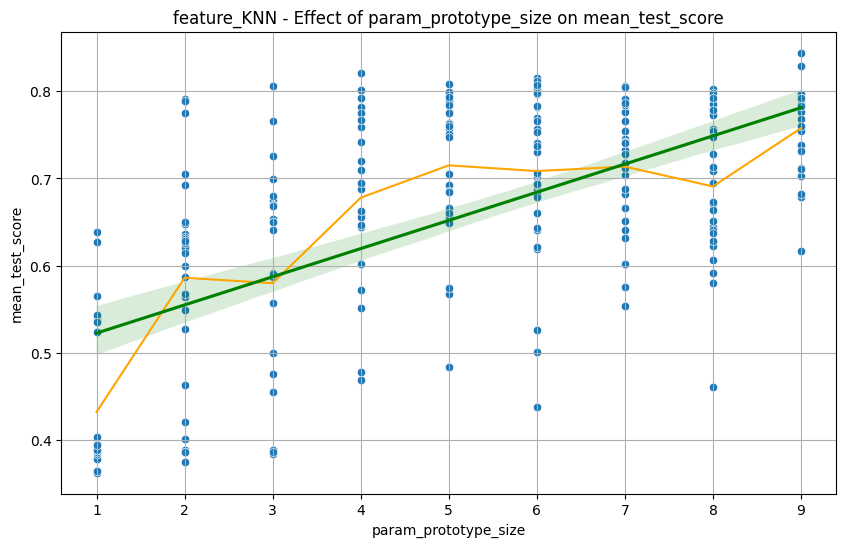

/tmp/ipykernel_1350456/3581515702.py:34: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", scale="width")


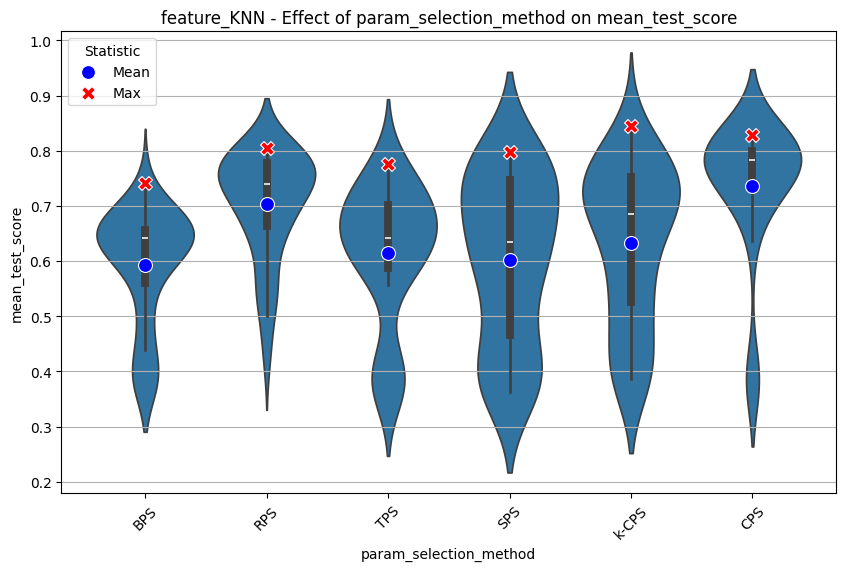

/tmp/ipykernel_1350456/3581515702.py:34: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", scale="width")


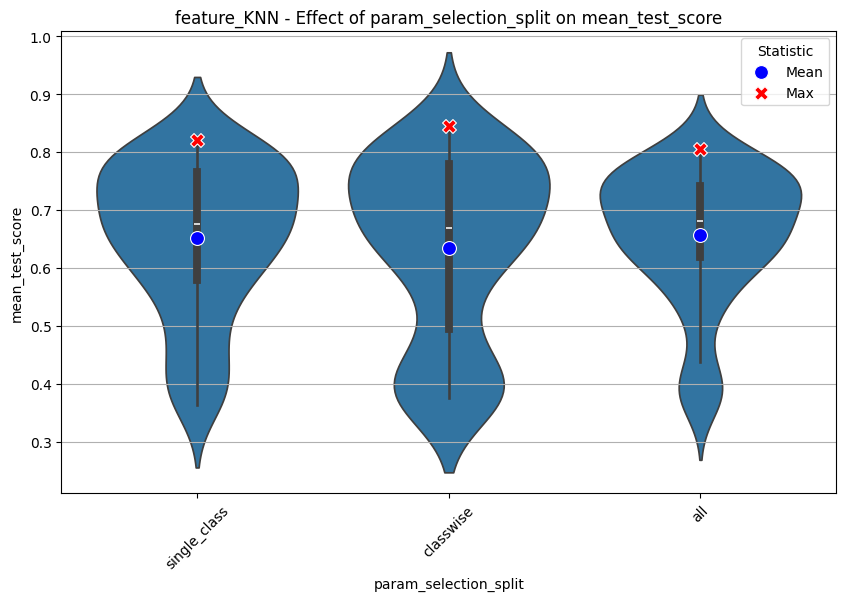

/tmp/ipykernel_1350456/3581515702.py:34: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=hyper_df, x=hyperparameter_column, y=results_column, inner="box", scale="width")


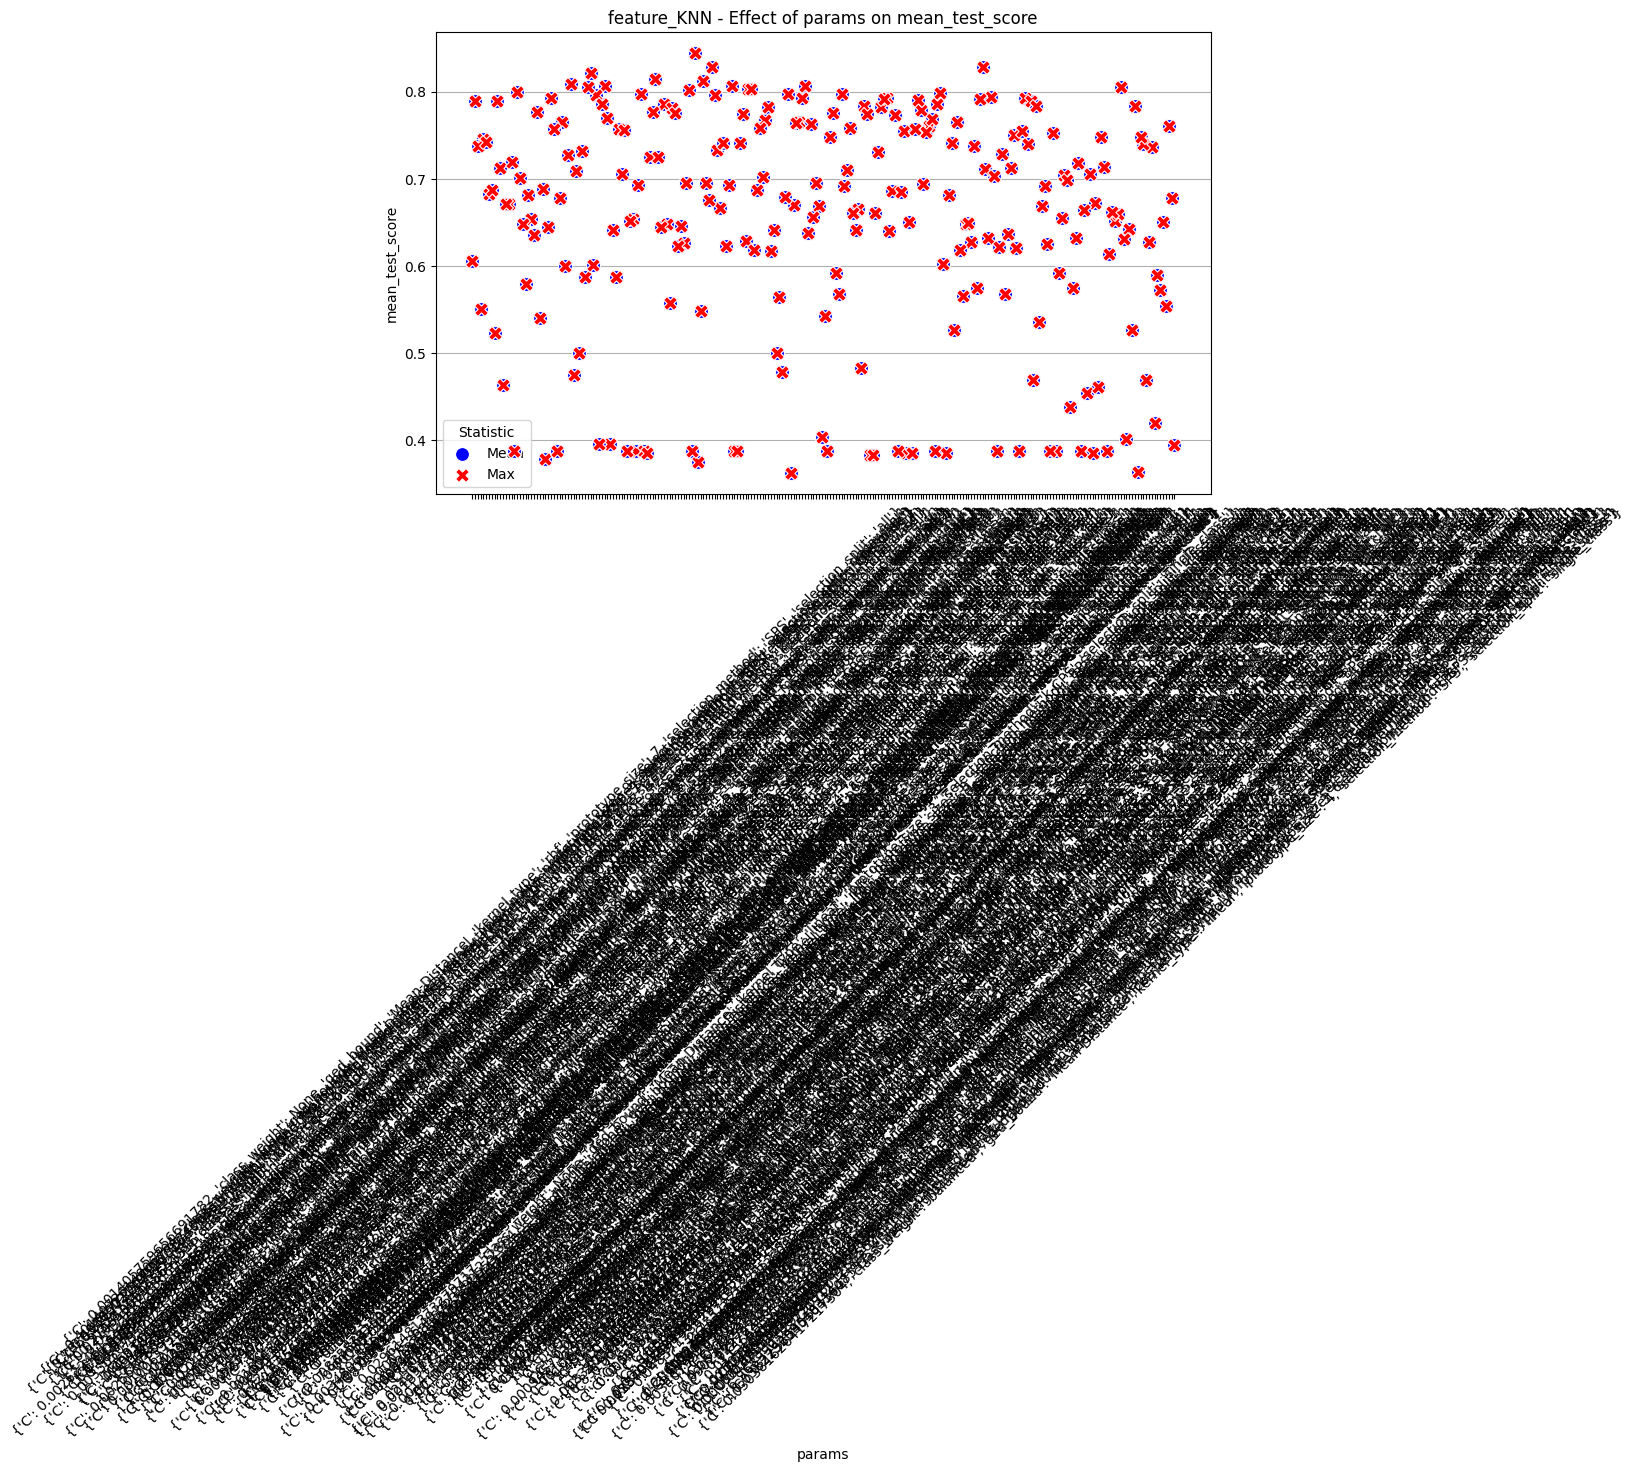

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


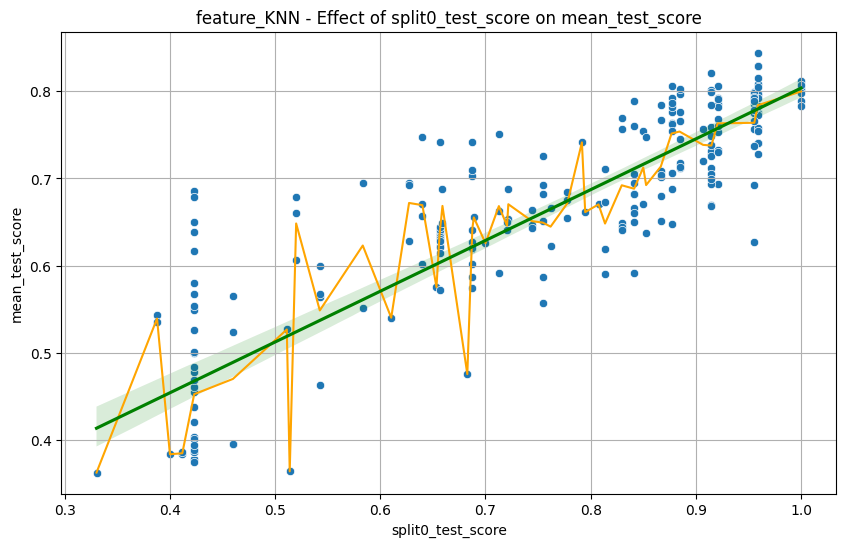

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


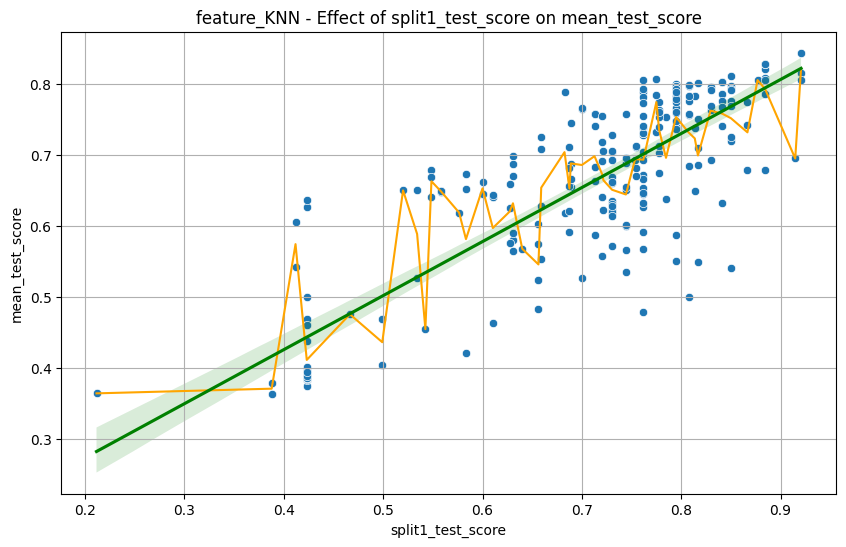

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


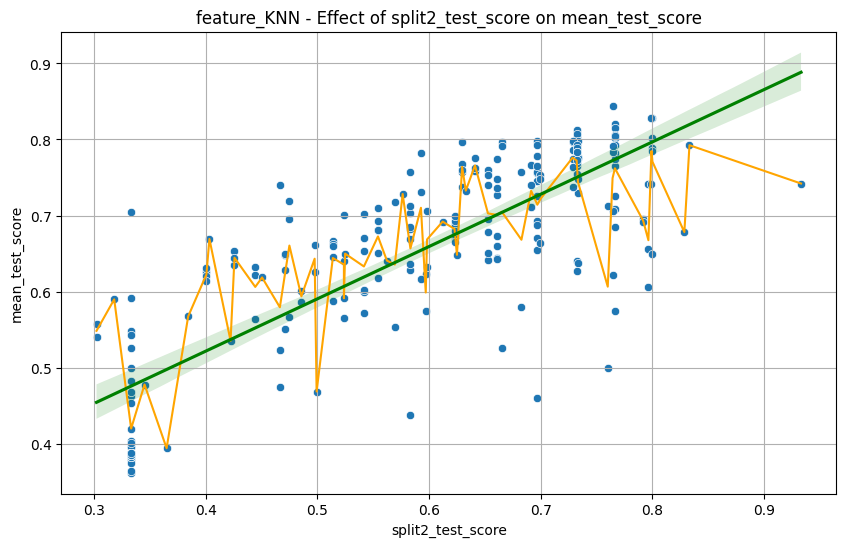

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


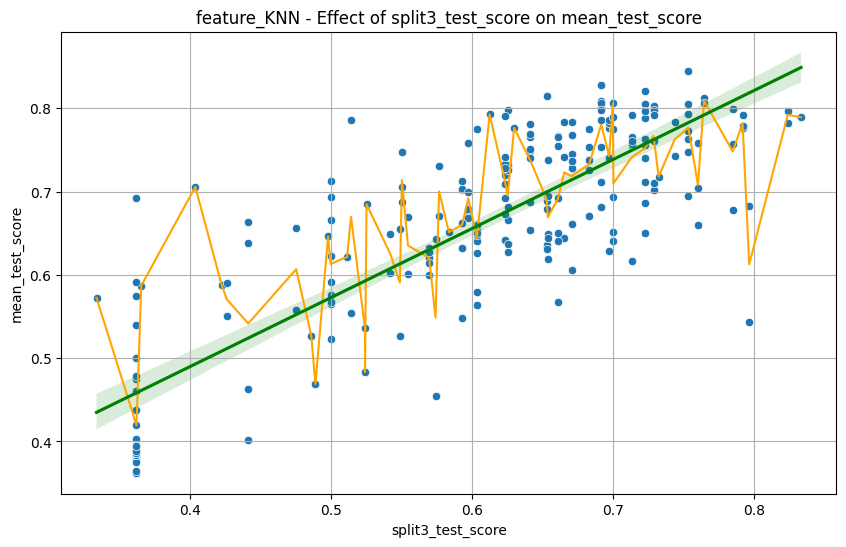

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


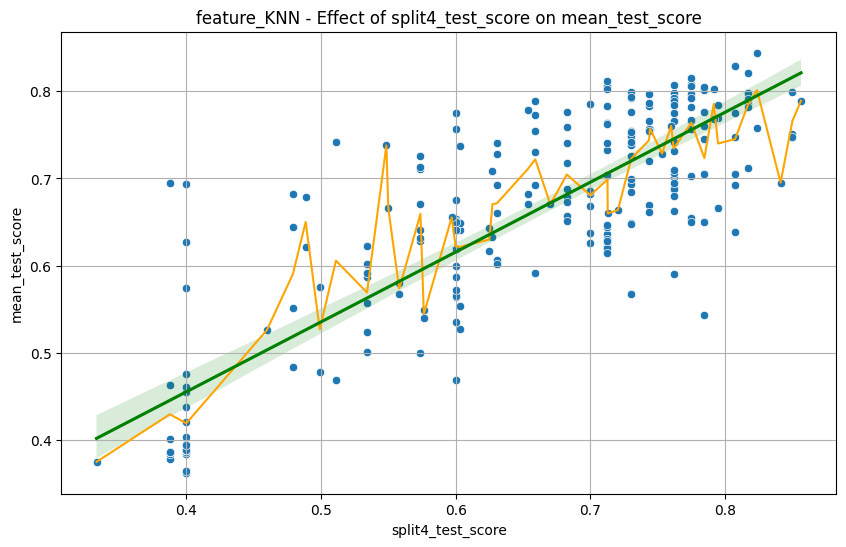

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


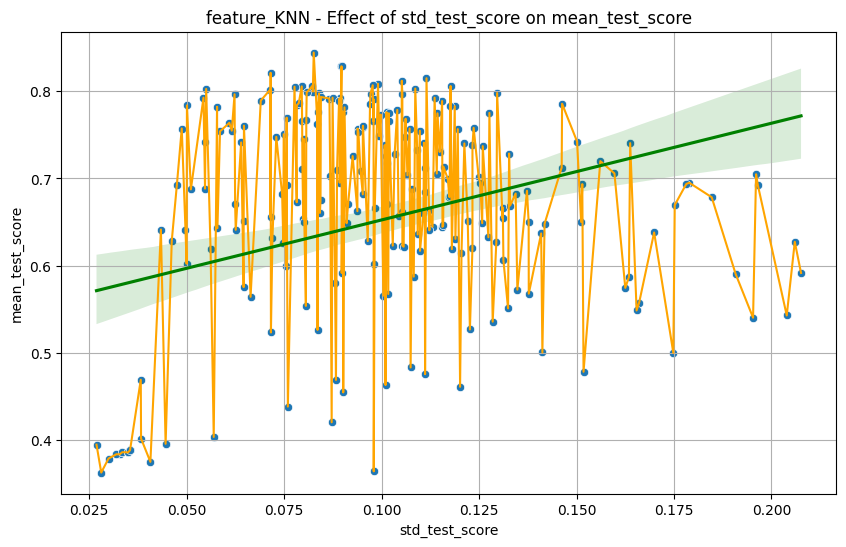

/tmp/ipykernel_1350456/3581515702.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hyper_df, x=hyperparameter_column, y=results_column, ci=None, color='orange')


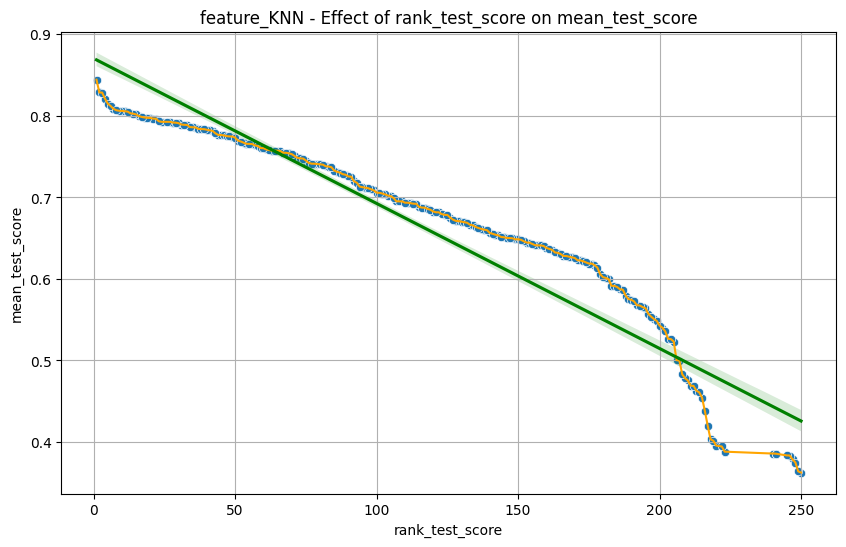

In [150]:
results_column = "mean_test_score"
Model_Name = "feature_KNN"

for col in hyper_df.columns:
    if col != results_column:
        plot_hyperparameter_effect(hyper_df, col, results_column, Model_Name)

In [151]:
display(hyper_df.sort_values(by='mean_test_score', ascending=False).head(30))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_ged_bound,param_kernel_type,param_prototype_size,param_selection_method,param_selection_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
79,0.003377,0.000105,0.001655,0.000019,0.148425,balanced,Mean-Distance,rbf,9,k-CPS,classwise,"{'C': 0.1484247111100888, 'class_weight': 'bal...",0.958960,0.920635,0.764310,0.753231,0.823737,0.844175,0.082570,1
85,0.003391,0.000121,0.001668,0.000040,0.032168,balanced,Mean-Distance,poly,9,CPS,classwise,"{'C': 0.032168103129393666, 'class_weight': 'b...",0.958960,0.884467,0.800000,0.691429,0.807445,0.828460,0.089662,2
181,0.003235,0.000178,0.001619,0.000008,0.012593,NaN,Mean-Distance,poly,9,CPS,classwise,"{'C': 0.012592506507560417, 'class_weight': No...",0.958960,0.884467,0.799107,0.691429,0.807445,0.828282,0.089719,3
42,0.006061,0.001214,0.001549,0.000008,0.077146,NaN,Mean-Distance,rbf,4,CPS,single_class,"{'C': 0.07714557051675644, 'class_weight': Non...",0.914773,0.884467,0.766407,0.722222,0.816850,0.820944,0.071521,4
65,0.003030,0.000078,0.001572,0.000010,0.001304,balanced,Mean-Distance,linear,6,CPS,classwise,"{'C': 0.0013043206539495936, 'class_weight': '...",0.958960,0.920635,0.766407,0.652778,0.775000,0.814756,0.111499,5
82,0.002685,0.000097,0.001578,0.000005,0.004276,NaN,Mean-Distance,rbf,6,CPS,single_class,"{'C': 0.004275829360618191, 'class_weight': No...",1.000000,0.850000,0.732143,0.764310,0.712722,0.811835,0.105162,6
35,0.002868,0.000350,0.004204,0.005341,0.015977,NaN,Mean-Distance,poly,5,k-CPS,classwise,"{'C': 0.015977411797562617, 'class_weight': No...",0.958960,0.884467,0.732143,0.691429,0.775000,0.808400,0.099063,7
118,0.003922,0.000262,0.001586,0.000009,0.020331,balanced,Mean-Distance,poly,6,CPS,single_class,"{'C': 0.020330998723095, 'class_weight': 'bala...",1.000000,0.775000,0.732143,0.764310,0.761905,0.806671,0.097706,8
92,0.002695,0.000081,0.001591,0.000022,0.003759,NaN,Mean-Distance,poly,6,CPS,classwise,"{'C': 0.0037591557417360963, 'class_weight': N...",0.876881,0.920635,0.766407,0.691429,0.775000,0.806070,0.082244,9
47,0.003186,0.000065,0.001618,0.000009,0.001017,balanced,Mean-Distance,rbf,7,CPS,single_class,"{'C': 0.0010171734430399397, 'class_weight': '...",1.000000,0.884467,0.732143,0.699666,0.712722,0.805800,0.117691,10
